In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn import preprocessing


proximity = "./data/0_Golden_Standard/Country_Borders_source_target_V06.tsv"
flights = "./data/0_Golden_Standard/country_flight_country_weighted.tsv"
covid = "./data/0_Golden_Standard/covid_data_01.csv"

In [2]:
pwd

'/home/jan/Code/MasterThesis'

In [3]:
prt = pd.read_csv(proximity,sep='\t')
flt = pd.read_csv(flights,sep='\t')
cov = pd.read_csv(covid,sep=',')

In [4]:
prt = prt.rename(columns={"iso-alpha-3":"iso_code_src", "Country": "src", "Neighbour":"trg"})
prt

,src,trg,iso_code_src,region
0,Afghanistan,China,AFG,Asia
1,Afghanistan,Iran (Islamic Republic of),AFG,Asia
2,Afghanistan,Pakistan,AFG,Asia
3,Afghanistan,Tajikistan,AFG,Asia
4,Afghanistan,Turkmenistan,AFG,Asia
...,...,...,...,...
791,Zambia,Zimbabwe,ZMB,Africa
792,Zimbabwe,Botswana,ZWE,Africa
793,Zimbabwe,Mozambique,ZWE,Africa
794,Zimbabwe,South Africa,ZWE,Africa


In [5]:
prt.loc[prt['iso_code_src'] == 'MDA']

,src,trg,iso_code_src,region
465,"Moldova, Republic of",Romania,MDA,Europe
466,"Moldova, Republic of",Ukraine,MDA,Europe


In [6]:
flt

,src,trg,weighted
0,Afghanistan,Azerbaijan,1
1,Afghanistan,India,7
2,Afghanistan,Iran,5
3,Afghanistan,Kuwait,1
4,Afghanistan,Pakistan,4
...,...,...,...
4553,Zimbabwe,Malawi,1
4554,Zimbabwe,Namibia,2
4555,Zimbabwe,South Africa,9
4556,Zimbabwe,Tanzania,1


In [7]:
cov

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30859,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30860,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30861,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30862,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
verify = cov[cov['iso_code']=="HKG"]
verify

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12537,HKG,Asia,Hong Kong,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12538,HKG,Asia,Hong Kong,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12539,HKG,Asia,Hong Kong,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12540,HKG,Asia,Hong Kong,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12541,HKG,Asia,Hong Kong,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12542,HKG,Asia,Hong Kong,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12543,HKG,Asia,Hong Kong,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12544,HKG,Asia,Hong Kong,2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12545,HKG,Asia,Hong Kong,2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86
12546,HKG,Asia,Hong Kong,2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,...,10.158,56054.92,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86


In [9]:
#drop irrelevant columns
cov = cov.drop(["new_cases", 
                "total_deaths",
                "new_deaths",
                "new_cases_per_million",
                "total_deaths_per_million",
                "new_deaths_per_million",
                "total_tests",
                "new_tests",
                "total_tests_per_thousand",
                "new_tests_per_thousand",
                "new_tests_smoothed",
                "new_tests_smoothed_per_thousand",
                "tests_units",
                "extreme_poverty",
                "cvd_death_rate",
                "population"], axis=1)

#set 999 days date for countries in which CoVid did not hit
#cov[['date']] = cov[['date']].fillna(pd.to_datetime("2022-10-13", format='%Y-%m-%d'))

#Removing non-country related values

cov = cov[cov.location != "International"]
cov = cov[cov.iso_code.map(len) <= 3]
cov = cov[cov.total_cases > 100]
cov = cov[cov.total_cases <= 500]
cov=cov.drop_duplicates(subset=['location'],keep="first")

#drop potentially useful columns
cov = cov.drop(["location",
                "population_density", 
                "median_age",
                "aged_65_older",
                "aged_70_older",
                "gdp_per_capita",
                "female_smokers",
                "male_smokers",
                "handwashing_facilities",
                "hospital_beds_per_thousand",
                "life_expectancy",
                "diabetes_prevalence"], axis=1)

#building target variable
cov[['date']] = cov['date'].fillna("2020-12-30")
cov['total_cases'] = cov['total_cases'].fillna("0")
cov = cov.rename(columns={"stringency_index": "days_since_100_cases_in_China_2019"})

cov['date'] = pd.to_datetime(cov['date'], format='%Y-%m-%d')


cov['date']


79      2020-03-29
206     2020-03-25
397     2020-03-21
525     2020-03-23
723     2020-06-11
           ...    
30061   2020-03-23
30241   2020-06-28
30297   2020-05-16
30403   2020-05-01
30549   2020-05-28
Name: date, Length: 180, dtype: datetime64[ns]

In [10]:
date1 = "2020-01-19"
date_obj= pd.to_datetime("2020-01-18", format='%Y-%m-%d')

cov["days_since_100_cases_in_China_2019"] = cov.apply(lambda row: row.date - date_obj, axis=1)

#dropping date, total_cases and total_cases_per_m and continent
cov_u = cov.drop(["date",
                "total_cases", 
                "total_cases_per_million",
                "continent"], axis=1)

cov_u = cov_u.rename(columns={"days_since_100_cases_in_China_2019" : "days_to_first_100_cases"})
cov_u


,iso_code,days_to_first_100_cases
79,AFG,71 days
206,ALB,67 days
397,DZA,63 days
525,AND,65 days
723,AGO,145 days
...,...,...
30061,VNM,65 days
30241,ESH,162 days
30297,YEM,119 days
30403,ZMB,104 days


In [11]:
cov_u.sort_values(by ='days_to_first_100_cases')[0:20]

,iso_code,days_to_first_100_cases
5923,CHN,1 days
25639,KOR,34 days
14580,JPN,35 days
14255,ITA,37 days
13343,IRN,40 days
10740,DEU,43 days
24783,SGP,43 days
25952,ESP,44 days
9975,FRA,44 days
29228,USA,45 days


In [12]:
set_iso = set(prt['src'])
set_fl = set(flt['src'])

In [13]:
def to_be_changed(t1,t2):
    to_add = [i for i in t2 if i not in t1]
    to_review = [i for i in t1 if i not in t2]
    return sorted(to_add), sorted(to_review)

In [14]:
# Common Replacements to set ISO 3166 standard
rep = {'British Virgin Islands': 'Virgin Islands (British)',
  'Burma': 'Myanmar',
  'Cape Verde' : 'Cabo Verde',
  'Congo (Brazzaville)': 'Congo',
  'Congo (Kinshasa)': 'Congo, Democratic Republic of the',
  "Cote d'Ivoire": "Côte d'Ivoire",
  'Czech Republic': "Czechia",
  'Falkland Islands':"Falkland Islands (Malvinas)",
  'Iran':"Iran (Islamic Republic of)",
  'Laos':"Lao People's Democratic Republic",
  'Macau': 'Macao',
  'Macedonia': 'North Macedonia',
  'Micronesia': "Micronesia (Federated States of)",
  'Moldova': "Moldova, Republic of",
  'North Korea':"Korea (Democratic People's Republic of)",
  'Reunion': "Réunion",
  'Russia':"Russian Federation",
  'South Korea':"Korea, Republic of",
  'Tanzania':"Tanzania, United Republic of",
  'United Kingdom':"United Kingdom of Great Britain and Northern Ireland",
  'United States':"United States of America",
  'Venezuela':"Venezuela (Bolivarian Republic of)",
  'Vietnam':"Viet Nam",
  'Virgin Islands':"Virgin Islands (British)"}

# Given a dataframes and a replacement list, it searches for the source and target country names in the database 
# and updates its naming with they values from the dict

def common_rep(dfo, dfr):
    for key, value in dfr.items():
        dfo.loc[dfo['src'] == key, 'src'] = value
        dfo.loc[dfo['trg'] == key, 'trg'] = value
    return dfo

flt = common_rep(flt, rep)
to_be_changed(set(prt['src']).union(set(prt['trg'])), set(flt['src']).union(set(flt['trg'])))

([],
 ['Andorra',
  'Antarctica',
  'Antartica',
  'Bonaire, Sint Eustatius and Saba',
  'Bouvet Island',
  'British Indian Ocean Territory',
  'Curaçao',
  'Eswatini',
  'French Southern Territories',
  'Heard Island and McDonald Islands',
  'Holy See',
  'Kosovo',
  'Liechtenstein',
  'Monaco',
  'Montserrat',
  'Palestine, State of',
  'Pitcairn',
  'Saint Barthélemy',
  'Saint Helena, Ascension and Tristan da Cunha',
  'Saint Martin (French part)',
  'San Marino',
  'Sint Maarten (Dutch part)',
  'South Georgia and the South Sandwich Islands',
  'Svalbard and Jan Mayen',
  'Syrian Arab Republic',
  'Timor-Leste',
  'Tokelau',
  'United States Minor Outlying Islands',
  'Virgin Islands (U.S.)',
  'Åland Islands'])

In [15]:
#verifying flt integrity
flt

,src,trg,weighted
0,Afghanistan,Azerbaijan,1
1,Afghanistan,India,7
2,Afghanistan,Iran (Islamic Republic of),5
3,Afghanistan,Kuwait,1
4,Afghanistan,Pakistan,4
...,...,...,...
4553,Zimbabwe,Malawi,1
4554,Zimbabwe,Namibia,2
4555,Zimbabwe,South Africa,9
4556,Zimbabwe,"Tanzania, United Republic of",1


In [16]:
# REMOVING DUPLICATES and ANTILLES

flt.drop_duplicates(keep="first",inplace=True) 


flt = flt.drop(flt[flt['src']=="Netherlands Antilles"].index)
flt = flt.drop(flt[flt['trg']=="Netherlands Antilles"].index)
flt


,src,trg,weighted
0,Afghanistan,Azerbaijan,1
1,Afghanistan,India,7
2,Afghanistan,Iran (Islamic Republic of),5
3,Afghanistan,Kuwait,1
4,Afghanistan,Pakistan,4
...,...,...,...
4553,Zimbabwe,Malawi,1
4554,Zimbabwe,Namibia,2
4555,Zimbabwe,South Africa,9
4556,Zimbabwe,"Tanzania, United Republic of",1


In [17]:
# REMOVING BI-DIRECTIONAL LOOPS

def one_source_addition(df,s,t,w):
    #df2 = df.copy(deep=True)
    i_protecc = []
    i_to_del = []

    for idx, row in df.iterrows():

        if ((df[t] == row[s]) & (df[s] == row[t])).any():
            #print("Flights from {} to {} = {}".format(row[s], row[t],row[w]))
            
            i_row = df.loc[((df[t] == row[s]) & (df[s] == row[t]))].index[0]
            #print(df2.loc[i_row, w])
            
            #print("Flights from {} to {} = {}".format(df.loc[i_row, s], df.loc[i_row, t], df.loc[i_row, w]))          
            
            new_w = row[w] + df.loc[i_row, w]
            df.at[idx, w] = new_w
            
            i_protecc.append(idx)
            if i_row not in i_protecc:
                i_to_del.append(i_row)
            #print(i_to_del)
            
        else:
            pass
    
    if i_to_del != []:
        df = df.drop(i_to_del)
    return df

In [18]:
flt = one_source_addition(flt, "src", "trg", "weighted")
flt

,src,trg,weighted
0,Afghanistan,Azerbaijan,2
1,Afghanistan,India,14
2,Afghanistan,Iran (Islamic Republic of),10
3,Afghanistan,Kuwait,2
4,Afghanistan,Pakistan,8
...,...,...,...
4513,Virgin Islands (British),Dominica,7
4516,Virgin Islands (British),Puerto Rico,29
4539,Zambia,Angola,1
4546,Zambia,Netherlands,3


In [19]:

# creating log_weighted flights
flt["log-weight"] = np.log(flt["weighted"])

#creating normalized log-weighted flights column

flt["norm-log-weight"]=((flt["log-weight"]-flt["log-weight"].min())/(flt["log-weight"].max()-flt["log-weight"].min()))
flt

,src,trg,weighted,log-weight,norm-log-weight
0,Afghanistan,Azerbaijan,2,0.693147,0.099916
1,Afghanistan,India,14,2.639057,0.380415
2,Afghanistan,Iran (Islamic Republic of),10,2.302585,0.331913
3,Afghanistan,Kuwait,2,0.693147,0.099916
4,Afghanistan,Pakistan,8,2.079442,0.299747
...,...,...,...,...,...
4513,Virgin Islands (British),Dominica,7,1.945910,0.280499
4516,Virgin Islands (British),Puerto Rico,29,3.367296,0.485389
4539,Zambia,Angola,1,0.000000,0.000000
4546,Zambia,Netherlands,3,1.098612,0.158363


In [20]:
#Countries with no flights:
no_fly = ['Andorra',
  'Antarctica',
  'Bonaire, Sint Eustatius and Saba',
  'Bouvet Island',
  'British Indian Ocean Territory',
  'Curaçao',
  'Eswatini',
  'French Southern Territories',
  'Heard Island and McDonald Islands',
  'Holy See',
  'Kosovo',
  'Liechtenstein',
  'Monaco',
  'Montserrat',
  'Netherlands Antilles',
  'Palestine, State of',
  'Pitcairn',
  'Saint Barthélemy',
  'Saint Helena, Ascension and Tristan da Cunha',
  'Saint Martin (French part)',
  'San Marino',
  'Sint Maarten (Dutch part)',
  'South Georgia and the South Sandwich Islands',
  'Svalbard and Jan Mayen',
  'Syrian Arab Republic',
  'Timor-Leste',
  'Tokelau',
  'United States Minor Outlying Islands',
  'Virgin Islands (U.S.)',
  'Åland Islands']

def no_air(no_flights, df):
    for e in no_flights:
        indexNames1 = df[df['src'] == e ].index
        indexNames2 = df[df['trg'] == e ].index
        df.drop(indexNames1 , inplace=True)
        df.drop(indexNames2 , inplace=True)
    return df

prt = no_air(no_fly, prt)
to_be_changed(set(prt['src']).union(set(prt['trg'])), set(flt['src']).union(set(flt['trg'])))

([], [])

In [21]:
# verifying prt integrity
prt

,src,trg,iso_code_src,region
0,Afghanistan,China,AFG,Asia
1,Afghanistan,Iran (Islamic Republic of),AFG,Asia
2,Afghanistan,Pakistan,AFG,Asia
3,Afghanistan,Tajikistan,AFG,Asia
4,Afghanistan,Turkmenistan,AFG,Asia
...,...,...,...,...
791,Zambia,Zimbabwe,ZMB,Africa
792,Zimbabwe,Botswana,ZWE,Africa
793,Zimbabwe,Mozambique,ZWE,Africa
794,Zimbabwe,South Africa,ZWE,Africa


# ISO NAMING

In [22]:
# Creating a dict of ISOs [keys] and src [values]

def create_dicts_from_df(df, col1, col2):
    d = {}
    i_d = {}
    for index, row in df.iterrows():
        if row[col1] in d:
            #key already in dict 1"
            pass
        
        if row[col2] in i_d:
            #key already in dict 2"
            pass
        
        else:
            d[row[col1]] = row[col2]
            i_d[row[col2]] = row[col1]
    
    return d, i_d

di_src, swapped_d = create_dicts_from_df(prt, "iso_code_src", "src")

In [23]:
# Manually adding NaN ISO Codes
di_src.update({"WSM":'Samoa',"KNA":'Saint Kitts and Nevis', "ANT": "Netherlands Antilles"}, ignore_index=True)
swapped_d.update({"Samoa":'WSM','Saint Kitts and Nevis':"KNA", "Netherlands Antilles": "ANT"}, ignore_index=True)

In [24]:
#Filling ISO_CODES_TRG from trg and a dict


def replace_df_values_w_dic(df, col1, col2, i_d):
    #new_df = df.copy(deep=True)
    nan_dict = {}    
    for index, row in df.iterrows():

        if row[col1] in i_d:
            #at method avoids running into problems when modifying the df and iterrows https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
            df.at[index,col2] = i_d[row[col1]]
        else:
            #print("NaN Alert with {}".format(df[col2][index]))
            if df[col2][index] in nan_dict:
                pass
            else:
                nan_dict[df[col2][index]] = "?"
            df.at[index,col2] = np.nan
    if nan_dict != {}:
        print("NaN Alert")
    return df, nan_dict

#careful as the value call is inverse in this function
prt, nan_d = replace_df_values_w_dic(prt, "src", "iso_code_src", swapped_d)
prt, nan_d = replace_df_values_w_dic(prt, "trg", "iso_code_trg", swapped_d)

In [25]:
#verifying that there are non nan's. 

nan_df = prt[prt.isna().any(axis=1)]
nan_df

,src,trg,iso_code_src,region,iso_code_trg


In [26]:
if 'Unnamed: 0' in prt.columns:
    prt = prt.drop(["Unnamed: 0"],axis=1)
prt

,src,trg,iso_code_src,region,iso_code_trg
0,Afghanistan,China,AFG,Asia,CHN
1,Afghanistan,Iran (Islamic Republic of),AFG,Asia,IRN
2,Afghanistan,Pakistan,AFG,Asia,PAK
3,Afghanistan,Tajikistan,AFG,Asia,TJK
4,Afghanistan,Turkmenistan,AFG,Asia,TKM
...,...,...,...,...,...
791,Zambia,Zimbabwe,ZMB,Africa,ZWE
792,Zimbabwe,Botswana,ZWE,Africa,BWA
793,Zimbabwe,Mozambique,ZWE,Africa,MOZ
794,Zimbabwe,South Africa,ZWE,Africa,ZAF


In [27]:
# FIXING EAST TIMOR ERROR
prt.loc[prt['iso_code_src'] == 'TL']
prt['iso_code_src'] = prt['iso_code_src'].replace(['TL'],'TLS')
prt['iso_code_trg'] = prt['iso_code_trg'].replace(['TL'],'TLS')

prt.loc[prt['trg'] == 'East Timor']

,src,trg,iso_code_src,region,iso_code_trg
343,Indonesia,East Timor,IDN,Asia,TLS


In [28]:
flt

,src,trg,weighted,log-weight,norm-log-weight
0,Afghanistan,Azerbaijan,2,0.693147,0.099916
1,Afghanistan,India,14,2.639057,0.380415
2,Afghanistan,Iran (Islamic Republic of),10,2.302585,0.331913
3,Afghanistan,Kuwait,2,0.693147,0.099916
4,Afghanistan,Pakistan,8,2.079442,0.299747
...,...,...,...,...,...
4513,Virgin Islands (British),Dominica,7,1.945910,0.280499
4516,Virgin Islands (British),Puerto Rico,29,3.367296,0.485389
4539,Zambia,Angola,1,0.000000,0.000000
4546,Zambia,Netherlands,3,1.098612,0.158363


In [29]:
prt.loc[prt['trg'] == 'Netherlands Antilles']

,src,trg,iso_code_src,region,iso_code_trg


In [30]:
#ISO Naming

#we drop target to avoid conflict on merge, only interested on src and iso code's to join with flt_u
prt_named = prt.copy()

di_src.update({"WSM":'Samoa',"KNA":'Saint Kitts and Nevis', "ANT": "Netherlands Antilles"}, ignore_index=True)
swapped_d.update({"Samoa":'WSM','Saint Kitts and Nevis':"KNA", "Netherlands Antilles": "ANT"}, ignore_index=True)

antilles = {"src": "Netherlands Antilles", "trg": "Netherlands Antilles", "iso_code_src": "ANT", "iso_code_trg": "ANT", "region":"Americas"}
samoa = {"src": "Samoa", "trg": "Samoa", "iso_code_src": "WSM", "iso_code_trg": "WSM", "region": "Oceania"}
skn = {"src": "Saint Kitts and Nevis", "trg": "Saint Kitts and Nevis", "iso_code_src": "KNA", "iso_code_trg": "KNA", "region":"Americas"}

prt_named = prt_named.append(antilles, ignore_index = True)
prt_named = prt_named.append(samoa, ignore_index = True)
prt_named = prt_named.append(skn, ignore_index = True)

#merging SRC and TRG and then splitting it again to avoid nans. Dropping regions for now, may come back to it later. 
prt_src_named = prt_named.drop(["trg", "iso_code_trg", "region"], axis=1).rename(columns={"src":"abc", "iso_code_src": "iso_code_gen"})
prt_trg_named = prt_named.drop(["src", "iso_code_src", "region"], axis=1).rename(columns={"trg":"abc", "iso_code_trg": "iso_code_gen"})

prt_merged = prt_src_named.append(prt_trg_named).drop_duplicates(subset=['abc', 'iso_code_gen'],keep="first")
prt_merged

prt_src = prt_merged.rename(columns={"abc":"src", "iso_code_gen": "iso_code_src"})
prt_trg = prt_merged.rename(columns={"abc":"trg", "iso_code_gen": "iso_code_trg"})

In [31]:
prt_src.loc[prt_src['src'] == "Netherlands Antilles"]

,src,iso_code_src
722,Netherlands Antilles,ANT


In [32]:
prt_src

,src,iso_code_src
0,Afghanistan,AFG
6,Albania,ALB
9,Algeria,DZA
16,American Samoa,ASM
19,Angola,AGO
...,...,...
710,Zambia,ZMB
718,Zimbabwe,ZWE
722,Netherlands Antilles,ANT
723,Samoa,WSM


In [33]:
prt_trg

,trg,iso_code_trg
0,Afghanistan,AFG
6,Albania,ALB
9,Algeria,DZA
16,American Samoa,ASM
19,Angola,AGO
...,...,...
710,Zambia,ZMB
718,Zimbabwe,ZWE
722,Netherlands Antilles,ANT
723,Samoa,WSM


In [34]:
def iso_fill(df1,df2,where, method):
    df3=pd.merge(df1,df2, on=where, how=method)
    return df3

In [35]:
flt

,src,trg,weighted,log-weight,norm-log-weight
0,Afghanistan,Azerbaijan,2,0.693147,0.099916
1,Afghanistan,India,14,2.639057,0.380415
2,Afghanistan,Iran (Islamic Republic of),10,2.302585,0.331913
3,Afghanistan,Kuwait,2,0.693147,0.099916
4,Afghanistan,Pakistan,8,2.079442,0.299747
...,...,...,...,...,...
4513,Virgin Islands (British),Dominica,7,1.945910,0.280499
4516,Virgin Islands (British),Puerto Rico,29,3.367296,0.485389
4539,Zambia,Angola,1,0.000000,0.000000
4546,Zambia,Netherlands,3,1.098612,0.158363


In [36]:
#updating flights DB
flt_u = iso_fill(flt,prt_src, where = ["src"], method = "inner")
flt_u = flt_u.drop_duplicates(subset=['src', 'trg'], keep="first")
flt_u = iso_fill(flt_u,prt_trg,where = ["trg"], method = "inner")
flt_u = flt_u.drop_duplicates(subset=['src', 'trg'],keep="first")

#filling iso_codes by src / trg names
#flt_u, nan_d1 = replace_df_values_w_dic(flt_u, "src", "iso_code_src", swapped_d)
#flt_u, nan_d2 = replace_df_values_w_dic(flt_u, "trg", "iso_code_trg", swapped_d)
flt_u

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg
0,Afghanistan,Azerbaijan,2,0.693147,0.099916,AFG,AZE
1,Austria,Azerbaijan,4,1.386294,0.199832,AUT,AZE
2,Afghanistan,India,14,2.639057,0.380415,AFG,IND
3,Australia,India,4,1.386294,0.199832,AUS,IND
4,Austria,India,4,1.386294,0.199832,AUT,IND
...,...,...,...,...,...,...,...
2287,Kiribati,Marshall Islands,2,0.693147,0.099916,KIR,MHL
2288,Morocco,Western Sahara,8,2.079442,0.299747,MAR,ESH
2289,Spain,Western Sahara,6,1.791759,0.258279,ESP,ESH
2290,Saint Kitts and Nevis,Bahamas,1,0.000000,0.000000,KNA,BHS


In [37]:
#dropping nan index (1)
#to_drop = flt_u[flt_u.isna().any(axis=1)].index
#to_drop
#flt_u = flt_u.drop(to_drop)
#flt_u


In [38]:
#DROPPING LOW FLIGHTS COUNTRIES


drop_l = ["American Samoa", 
          "Christmas Island", 
          "Cocos (Keeling) Islands", 
          "Cook Islands", 
          "Falkland Islands (Malvinas)",
          "French Polynesia",
          "Lesotho",
          "Marshall Islands",
          "Nauru",
          "Niue",
          "Saint Vincent and the Grenadines",
          "Swaziland",
          "Tuvalu",
          "Wallis and Futuna"
         ]

low_fly = flt_u[flt_u["src"].isin(drop_l)].index
low_fly2 = flt_u[flt_u["trg"].isin(drop_l)].index
i_drop = low_fly.union(low_fly2)


flt_u = flt_u.drop(i_drop)


low_flights = flt_u.loc[(flt_u["weighted"] <= 1)].index

flt_u = flt_u.drop(low_flights)
flt_u

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg
0,Afghanistan,Azerbaijan,2,0.693147,0.099916,AFG,AZE
1,Austria,Azerbaijan,4,1.386294,0.199832,AUT,AZE
2,Afghanistan,India,14,2.639057,0.380415,AFG,IND
3,Australia,India,4,1.386294,0.199832,AUS,IND
4,Austria,India,4,1.386294,0.199832,AUT,IND
...,...,...,...,...,...,...,...
2284,Japan,Palau,5,1.609438,0.231997,JPN,PLW
2285,Micronesia (Federated States of),Palau,2,0.693147,0.099916,FSM,PLW
2286,Ireland,Isle of Man,2,0.693147,0.099916,IRL,IMN
2288,Morocco,Western Sahara,8,2.079442,0.299747,MAR,ESH


In [39]:
# CONSIDER ALSO DROPPING ON COV_U. 

In [40]:
# verifying that there are no nan's
nans_flt = flt_u[flt_u.isna().any(axis=1)]
nans_flt

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg


In [41]:
cov_u = cov_u.rename(columns={"iso_code": "iso_code_src"})
cov_u

,iso_code_src,days_to_first_100_cases
79,AFG,71 days
206,ALB,67 days
397,DZA,63 days
525,AND,65 days
723,AGO,145 days
...,...,...
30061,VNM,65 days
30241,ESH,162 days
30297,YEM,119 days
30403,ZMB,104 days


In [42]:
# UPDATED STRATEGY: MERGE COUNTRY NAME FROM FLT, SEPARATE COVID CASES CALCULATION.

flt_partial = flt_u.drop(columns=['trg', 'weighted', 'log-weight', 'norm-log-weight', 'iso_code_trg'], axis=1).drop_duplicates(subset=['src', 'iso_code_src'],keep="first")
flt_partial

,src,iso_code_src
0,Afghanistan,AFG
1,Austria,AUT
3,Australia,AUS
5,Bahrain,BHR
6,Bangladesh,BGD
...,...,...
1840,Faroe Islands,FRO
2074,Greenland,GRL
2141,Niger,NER
2229,Mayotte,MYT


In [43]:
cov_only = iso_fill(prt_src,cov_u,where = "iso_code_src", method = "left")
cov_only = cov_only.drop_duplicates(subset=['src', 'iso_code_src'],keep="first")
cov_only

#fixing corner cases

cov_only["days_to_first_100_cases"] = cov_only.days_to_first_100_cases.fillna(
    pd.to_datetime("2022-10-13", format='%Y-%m-%d') - pd.to_datetime("2020-01-18", format='%Y-%m-%d'))

cov_only

#CAREFUL, DON'T DO THIS
#flt_u = flt_u.dropna()

,src,iso_code_src,days_to_first_100_cases
0,Afghanistan,AFG,71 days
1,Albania,ALB,67 days
2,Algeria,DZA,63 days
3,American Samoa,ASM,999 days
4,Angola,AGO,145 days
...,...,...,...
219,Zambia,ZMB,104 days
220,Zimbabwe,ZWE,131 days
221,Netherlands Antilles,ANT,999 days
222,Samoa,WSM,999 days


In [44]:
# verification
cov_only.isna().values.any()

False

In [45]:
# verification
#cov_only.loc[flt_u['src'] == 'Western Sahara']
cov_only.sort_values(['days_to_first_100_cases'], ascending=[True])[:50]

,src,iso_code_src,days_to_first_100_cases
39,China,CHN,1 days
109,"Korea, Republic of",KOR,34 days
102,Japan,JPN,35 days
100,Italy,ITA,37 days
95,Iran (Islamic Republic of),IRN,40 days
75,Germany,DEU,43 days
179,Singapore,SGP,43 days
69,France,FRA,44 days
186,Spain,ESP,44 days
209,United States of America,USA,45 days


In [46]:
# Do the same with countries_proximity
#prt_u = iso_fill(prt,cov_u_trg,"iso_code_trg")
#prt_u = prt_u.drop_duplicates(subset=['src', 'trg'],keep="first")

#fixing corner cases

#prt_u["days_to_first_100_cases"] = prt_u.days_to_first_100_cases.fillna(
#    pd.to_datetime("2022-10-13", format='%Y-%m-%d') - pd.to_datetime("2020-01-18", format='%Y-%m-%d'))

#DON'T DO THIS
#prt_u = prt_u.dropna()

In [47]:
# verification
#prt_u.isna().values.any()

In [48]:
# verification
#prt_u.isna().values.any()
#prt_u.loc[prt_u['iso_code_trg'] == 'MDA']
#prt_u.sort_values(['src', 'days_since_100_cases_in_China_2019'], ascending=[False, True])[-50:]

In [49]:
# id'ing a potential missmatch on countries
prt_u = prt
to_be_changed(set(prt_u['src']).union(set(prt_u['trg'])), set(flt_u['src']).union(set(flt_u['trg'])))

([],
 ['American Samoa',
  'Christmas Island',
  'Cocos (Keeling) Islands',
  'Cook Islands',
  'Falkland Islands (Malvinas)',
  'French Polynesia',
  'Lesotho',
  'Marshall Islands',
  'Nauru',
  'Niue',
  'Saint Vincent and the Grenadines',
  'Swaziland',
  'Tuvalu',
  'Wallis and Futuna'])

In [50]:
found_c = prt_u[prt_u['src'].str.contains('Netherlands Antilles')]
found_c += prt_u[prt_u['trg'].str.contains('Netherlands Antilles')]

print(found_c.count())

src             0
trg             0
iso_code_src    0
region          0
iso_code_trg    0
dtype: int64


In [51]:
found_c = flt_u[flt_u['src'].str.contains('Netherlands Antilles')]
found_c += flt_u[flt_u['trg'].str.contains('Netherlands Antilles')]

print(found_c.count())

src                0
trg                0
weighted           0
log-weight         0
norm-log-weight    0
iso_code_src       0
iso_code_trg       0
dtype: int64


In [52]:
# DOUBLE CHECKING ON EAST TIMOR ISO CODE ERROR

prt_u.loc[prt_u['src'] == 'East Timor']
flt_u.loc[flt_u['src'] == 'East Timor']

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg
1436,East Timor,Indonesia,2,0.693147,0.099916,TLS,IDN
1531,East Timor,Singapore,2,0.693147,0.099916,TLS,SGP


In [53]:
flt_u

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg
0,Afghanistan,Azerbaijan,2,0.693147,0.099916,AFG,AZE
1,Austria,Azerbaijan,4,1.386294,0.199832,AUT,AZE
2,Afghanistan,India,14,2.639057,0.380415,AFG,IND
3,Australia,India,4,1.386294,0.199832,AUS,IND
4,Austria,India,4,1.386294,0.199832,AUT,IND
...,...,...,...,...,...,...,...
2284,Japan,Palau,5,1.609438,0.231997,JPN,PLW
2285,Micronesia (Federated States of),Palau,2,0.693147,0.099916,FSM,PLW
2286,Ireland,Isle of Man,2,0.693147,0.099916,IRL,IMN
2288,Morocco,Western Sahara,8,2.079442,0.299747,MAR,ESH


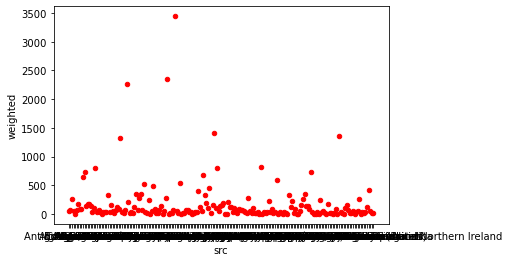

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot of the biggest "src" countries
df_nodes_src = flt_u.groupby(["src"]).sum().reset_index()
df_nodes_src
df_nodes_src.plot(kind='scatter',x="src",y='weighted',color='red')
plt.show()

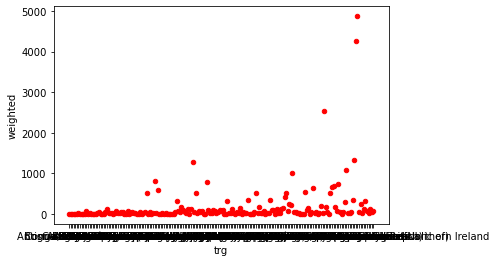

In [55]:
# a scatter plot of the biggest "trg" countries
df_nodes_trg = flt_u.groupby(["trg"]).sum().reset_index()
df_nodes_trg
df_nodes_trg.plot(kind='scatter',x="trg",y='weighted',color='red')
plt.show()

In [56]:
flt_u.describe()


,weighted,log-weight,norm-log-weight
count,2215.000000,2215.000000,2215.000000
mean,15.535440,1.830520,0.263866
std,47.055681,1.103616,0.159084
min,2.000000,0.693147,0.099916
25%,2.000000,0.693147,0.099916
50%,4.000000,1.386294,0.199832
75%,12.000000,2.484907,0.358194
max,1030.000000,6.937314,1.000000


In [57]:
Q1 = flt_u.quantile(0.25)
Q3 = flt_u.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

weighted           10.000000
log-weight          1.791759
norm-log-weight     0.258279
dtype: float64


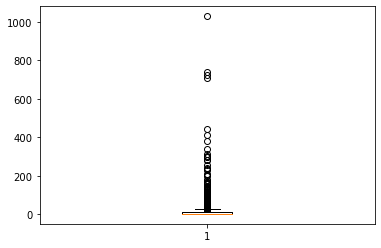

In [58]:
plt.boxplot(flt_u["weighted"])
plt.show()


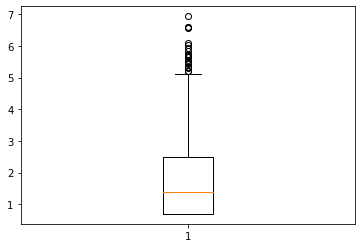

In [59]:
plt.boxplot(flt_u["log-weight"])
plt.show()

<AxesSubplot:>

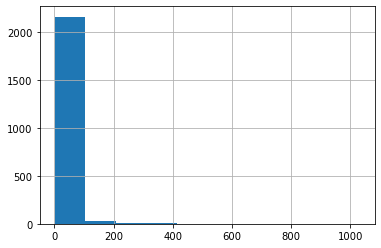

In [60]:
flt_u.weighted.hist()

<AxesSubplot:>

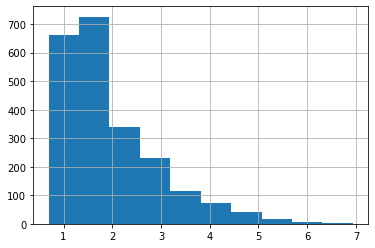

In [61]:
flt_u["log-weight"].hist()

In [62]:
from datetime import datetime, timedelta

# Converting from timedelta into integer to avoid saving in csv errors
#prt_u["days_to_first_100_cases"] = prt_u["days_to_first_100_cases"]/(timedelta (days=1))
#flt_u["days_to_first_100_cases"] = flt_u["days_to_first_100_cases"]/(timedelta (days=1))
cov_only["days_to_first_100_cases"] = cov_only["days_to_first_100_cases"]/(timedelta (days=1))


In [63]:
cov_only.sort_values(by=["days_to_first_100_cases"], ascending=False)[0:55]

,src,iso_code_src,days_to_first_100_cases
112,Lao People's Democratic Republic,LAO,999.0
90,Hong Kong,HKG,999.0
141,Nauru,NRU,999.0
133,Micronesia (Federated States of),FSM,999.0
131,Mayotte,MYT,999.0
128,Martinique,MTQ,999.0
127,Marshall Islands,MHL,999.0
120,Macao,MAC,999.0
108,Korea (Democratic People's Republic of),PRK,999.0
107,Kiribati,KIR,999.0


In [77]:
#prt_u["weeks_since_100_cases"] = prt_u["days_to_first_100_cases"].astype(int)//7
#flt_u["weeks_since_100_cases"] = flt_u["days_to_first_100_cases"].astype(int)//7
#flt_u[flt_u['src']=="Spain"]
cov_only["weeks_since_100_cases"] = cov_only["days_to_first_100_cases"].astype(int)//7
cov_only[cov_only['src']=="Finland"]

flt_u.sort_values(by=["weighted"], ascending = False)
flt_u[flt_u['trg']=="United Kingdom of Great Britain and Northern Ireland"].sort_values(by=["weighted"], ascending = False)[0:25]

,src,trg,weighted,log-weight,norm-log-weight,iso_code_src,iso_code_trg
421,Spain,United Kingdom of Great Britain and Northern I...,1030,6.937314,1.000000,ESP,GBR
365,France,United Kingdom of Great Britain and Northern I...,315,5.752573,0.829222,FRA,GBR
379,Italy,United Kingdom of Great Britain and Northern I...,282,5.641907,0.813270,ITA,GBR
366,Germany,United Kingdom of Great Britain and Northern I...,206,5.327876,0.768003,DEU,GBR
369,Greece,United Kingdom of Great Britain and Northern I...,200,5.298317,0.763742,GRC,GBR
428,Turkey,United Kingdom of Great Britain and Northern I...,180,5.192957,0.748554,TUR,GBR
408,Portugal,United Kingdom of Great Britain and Northern I...,166,5.111988,0.736883,PRT,GBR
407,Poland,United Kingdom of Great Britain and Northern I...,134,4.897840,0.706014,POL,GBR
376,Ireland,United Kingdom of Great Britain and Northern I...,126,4.836282,0.697140,IRL,GBR
401,Netherlands,United Kingdom of Great Britain and Northern I...,107,4.672829,0.673579,NLD,GBR


In [65]:
#verifying that only China is patient 0
#prt_u[prt_u['weeks_since_100_cases']==0]
#flt_u[flt_u['weeks_since_100_cases']==0]
cov_only[cov_only['weeks_since_100_cases']==0]

,src,iso_code_src,days_to_first_100_cases,weeks_since_100_cases
39,China,CHN,1.0,0


In [66]:
prt_u.to_csv('./data/0_Golden_Standard/proximity_clean_05.csv')
flt_u.to_csv('./data/0_Golden_Standard/flights_normalized_06.csv')
cov_only.to_csv('./data/0_Golden_Standard/cov_for_distance_01.csv')